In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
from pprint import pprint

In [ ]:
df= pd.read_csv("https://github.com/shubhamawasthi0301/modified_ID3_algorithm/raw/main/changes-visitors-covid.csv")
df2 = pd.read_csv("https://github.com/shubhamawasthi0301/modified_ID3_algorithm/raw/main/owid-covid-data.csv")

In [ ]:
df

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
0,Afghanistan,AFG,2020-02-17,0.000,4.000,1.333,5.667,1.000,-6.333
1,Afghanistan,AFG,2020-02-18,0.750,4.250,0.750,6.500,1.500,-3.250
2,Afghanistan,AFG,2020-02-19,0.400,4.000,0.800,5.200,1.400,-1.600
3,Afghanistan,AFG,2020-02-20,0.000,3.833,0.833,5.000,1.000,-0.333
4,Afghanistan,AFG,2020-02-21,0.000,4.571,0.714,5.286,1.429,0.571
...,...,...,...,...,...,...,...,...,...
61945,Zimbabwe,ZWE,2021-05-28,32.286,57.429,-0.286,32.714,40.286,11.857
61946,Zimbabwe,ZWE,2021-05-29,33.143,58.143,-0.714,33.429,41.571,11.714
61947,Zimbabwe,ZWE,2021-05-30,34.714,60.000,-1.286,34.143,42.571,12.000
61948,Zimbabwe,ZWE,2021-05-31,35.143,61.000,-1.857,34.286,42.571,13.143


In [ ]:
df2

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93326,ZWE,Africa,Zimbabwe,2021-05-30,38944.0,11.0,37.429,1594.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93327,ZWE,Africa,Zimbabwe,2021-05-31,38961.0,17.0,37.857,1594.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93328,ZWE,Africa,Zimbabwe,2021-06-01,38998.0,37.0,41.714,1599.0,5.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93329,ZWE,Africa,Zimbabwe,2021-06-02,39031.0,33.0,30.286,1599.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
country = "India"

In [ ]:
new_df = df.loc[df["Entity"]==country]

In [ ]:
new_df2 = df2.loc[df2["location"]==country]

In [ ]:
new_df

,Entity,Code,Day,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
23897,India,IND,2020-02-17,0.667,1.667,0.000,2.000,3.000,3.000
23898,India,IND,2020-02-18,0.500,1.750,0.000,2.000,3.250,3.000
23899,India,IND,2020-02-19,0.400,1.800,0.200,1.800,2.800,3.200
23900,India,IND,2020-02-20,0.500,2.000,0.000,2.333,3.167,3.333
23901,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143
...,...,...,...,...,...,...,...,...,...
24363,India,IND,2021-05-28,-61.714,-25.000,24.143,-49.143,-41.000,-45.429
24364,India,IND,2021-05-29,-61.286,-24.429,23.714,-48.714,-40.000,-44.571
24365,India,IND,2021-05-30,-61.143,-24.714,23.714,-49.000,-39.143,-44.286
24366,India,IND,2021-05-31,-60.143,-23.429,23.286,-48.286,-38.000,-43.429


In [ ]:
columns = ['location','date','new_cases']

In [ ]:
new_df2 = new_df2[columns]
new_df2

,location,date,new_cases
38584,India,2020-01-30,1.0
38585,India,2020-01-31,0.0
38586,India,2020-02-01,0.0
38587,India,2020-02-02,1.0
38588,India,2020-02-03,1.0
...,...,...,...
39070,India,2021-05-30,152734.0
39071,India,2021-05-31,127510.0
39072,India,2021-06-01,132788.0
39073,India,2021-06-02,134154.0


In [ ]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 38584 to 39074
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   location   491 non-null    object 
 1   date       491 non-null    object 
 2   new_cases  491 non-null    float64
dtypes: float64(1), object(2)
memory usage: 15.3+ KB


In [ ]:
new_df.loc['Day'] = pd.to_datetime(new_df['Day'])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [ ]:
new_df2.loc['date'] = pd.to_datetime(new_df2['date'])

In [ ]:
new_df.dtypes

Entity                   object
Code                     object
Day                      object
retail_and_recreation    object
grocery_and_pharmacy     object
residential              object
transit_stations         object
parks                    object
workplaces               object
dtype: object

In [ ]:
new_df.rename(columns = {'Day':'date'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
merged_df = new_df.merge(new_df2, how = 'inner', on = ['date'])

In [ ]:
merged_df

,Entity,Code,date,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces,location,new_cases
0,India,IND,2020-02-17,0.667,1.667,0.0,2.0,3.0,3.0,India,0.0
1,India,IND,2020-02-18,0.5,1.75,0.0,2.0,3.25,3.0,India,0.0
2,India,IND,2020-02-19,0.4,1.8,0.2,1.8,2.8,3.2,India,0.0
3,India,IND,2020-02-20,0.5,2.0,0.0,2.333,3.167,3.333,India,0.0
4,India,IND,2020-02-21,-0.143,1.714,0.714,1.429,3.571,0.143,India,0.0
...,...,...,...,...,...,...,...,...,...,...,...
467,India,IND,2021-05-29,-61.286,-24.429,23.714,-48.714,-40.0,-44.571,India,165553.0
468,India,IND,2021-05-30,-61.143,-24.714,23.714,-49.0,-39.143,-44.286,India,152734.0
469,India,IND,2021-05-31,-60.143,-23.429,23.286,-48.286,-38.0,-43.429,India,127510.0
470,India,IND,2021-06-01,-58.714,-21.143,22.714,-47.0,-36.571,-42.429,India,132788.0


In [ ]:
merged_df.dropna(inplace=True)

In [ ]:
merged_df.drop(columns = ["Entity","Code","location"],inplace = True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 471 entries, 0 to 470
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   471 non-null    object
 1   retail_and_recreation  471 non-null    object
 2   grocery_and_pharmacy   471 non-null    object
 3   residential            471 non-null    object
 4   transit_stations       471 non-null    object
 5   parks                  471 non-null    object
 6   workplaces             471 non-null    object
 7   new_cases              471 non-null    object
dtypes: object(8)
memory usage: 33.1+ KB


In [ ]:
merged_df1=merged_df.drop(columns=['date'])

In [ ]:
col = list(merged_df.columns)
col.remove('date')
col

['retail_and_recreation',
 'grocery_and_pharmacy',
 'residential',
 'transit_stations',
 'parks',
 'workplaces',
 'new_cases']

In [ ]:
merged_df[col] = merged_df[col].astype(float)

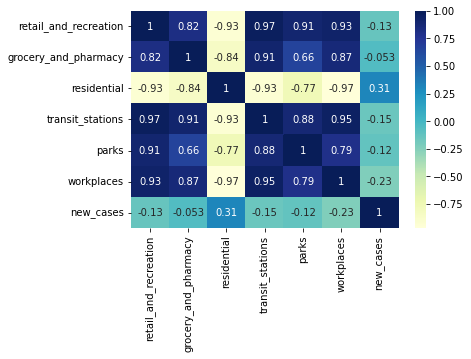

In [ ]:
hmap = sb.heatmap(merged_df[col].corr(),cmap = "YlGnBu",annot=True)

In [ ]:
import sys
import random
#train_test slpit function
def my_split(X,y,test_fraction=0.3,random_state = 0):                                            #default value of test_size_fraction = 30%
  
  #Raise an exception if test_fraction is not between 0 and 1
  if test_fraction<=0 or test_fraction >=1 :
    try:
      raise ValueError("test_fraction should be between 0 and 1 (exclusive)")
    except ValueError as err:
      print(err)
      sys.exit(1)

  #test_size = 30% of size of the dataset
  #choose random indices between 0 and the number of data_points 
  #the number of indices = test_size
  random.seed(random_state)
  ar =random.sample(range(X.shape[0]),int(test_fraction*X.shape[0]))            
  #print("length of index array : ",len(ar),"\n")

  #creating an array filled with false values
  ind = np.full(X.shape[0],False,dtype=bool)         
  
  #marking the test_indices as true                        
  ind[ar]=True;
  #Splitting the dataset into training and testing
  X_train = X[~ind]
  y_train = y[~ind]
  X_test = X[ind]
  y_test = y[ind]

  return X_train,X_test,y_train,y_test

In [ ]:
def mean(X):
  #if non-numeric column is input then return 0 
  if not pd.api.types.is_numeric_dtype(X):
      return None
  sum = 0
  for i in X:
      sum+=i
  if X.shape[0]!=0:
      sum/=X.shape[0]
  return sum
    
def std_dev(X):
  #if non-numeric column is input then return -1 
  if not pd.api.types.is_numeric_dtype(X):
      return -1
  #mean of the array
  mn = mean(X)
  
  #mean of sqaures
  sq = mean(X**2)
  
  #standard_deviation = mean of squares - square of mean
  return (sq-mn**2)**0.5
def RSS(X):
  #if non-numeric column is input then return -1 
  if not pd.api.types.is_numeric_dtype(X):
      return -1
  #mean of the array
  mn = mean(X)
  rss = np.sum((X-mn)**2)
  return rss

In [ ]:
def mse(y, y_hat) :
  return mean((y-y_hat)**2)

In [ ]:
def my_r2_score(y,y_hat):
  ss_res = mse(y,y_hat)
  mn = np.full(y.shape,mean(y))
  ss_tot = mse(y,mn)
  return 1-ss_res/ss_tot

In [ ]:
class ID3_A_regressor:
    def __init__(self):
      self.dec_tree = dict()
      self.depth = 0

    def fit(self, input_features, target_variable,max_depth=float('inf'),min_sdr=0,min_instances=0):
      data = input_features.copy()

      #appending the target variable to the dataframe
      data[target_variable.name] = target_variable
      
      #flushing any old value of depth
      self.depth =0

      #growing the decision tree
      self.dec_tree = self.decision_tree(data,data,target_variable.name,max_depth,min_sdr,min_instances)

    def SDR(self,input_data, feature_name,feature_value, target_name):
      #function to calculate the standard deviation reduction for a particular feature value

      #if data type of the column is not numeric return None
        if not pd.api.types.is_numeric_dtype(input_data[feature_name]):
            return None
        parent_sd = std_dev(input_data[target_name])
        
        mask = input_data[feature_name]<=feature_value
        
        #divinding the data into two classes: one less than than the feature value and the other greater than the feature value
        class_1 = input_data[mask]
        class_2 = input_data[~mask]
        
        #calculating the probabilities of both the classes
        prob_1 = class_1.shape[0]/(class_1.shape[0]+class_2.shape[0])
        prob_2 = 1-prob_1
        
        #weighted_standard_dev
        weighted_sd = std_dev(class_1[target_name])*prob_1+std_dev(class_2[target_name])*prob_2
        return parent_sd - weighted_sd
    
    def feature_split_point(self,input_data, feature_name,target_name):
        
        #sorting the values by the feature
        inp_df = input_data.sort_values(by=feature_name)
        
        unique_val = inp_df[feature_name].unique()
        #array containing mean of adjacent values
        split_candidates = [(unique_val[i] + unique_val[i+1])/2 for i in range(unique_val.shape[0]-1)]
        
        #initializing the values
        sdr_max = -1
        best_split_value = None
        
        for value in split_candidates :
            sdr= self.SDR(inp_df,feature_name,value,target_name)
            if sdr>sdr_max :
                sdr_max = sdr
                best_split_value = value
                
        return best_split_value,sdr_max
      
    def best_split(self,input_data,target_name):
      #function to calulate the best_split point for any sub-dataset
      #returns the best-split column and corresponding feature value as well as SDR
      best_feature = None
      best_split_val = None
      best_sdr = -1

      #extracting the list of input features
      features = list(input_data.columns)
      features.remove(target_name)

      for feature in features:  #looping over all the features
        split_val, sdr = self.feature_split_point(input_data,feature,target_name)

        if sdr>0 and sdr>best_sdr : 
          #if there is actually a reduction in the standard deviation and the reduction is more than the best so far then 
          #update the column to split and store corresponding split value and SDR 
          best_sdr = sdr
          best_split_val = split_val
          best_feature = feature

      return best_feature,best_split_val,best_sdr
    
    def split_data(self,input_data,feature_name,feature_value):
      #function to split the data into two halfs depending on the feature value
      
      if feature_name in input_data.columns : #checking if feature is present in the dataset 
        mask = input_data[feature_name]<=feature_value
        lhs_data = input_data[mask]
        rhs_data = input_data[~mask]

        return lhs_data,rhs_data
      else:
         #checking if feature is not present in the dataset, then return none
        return None
    
    def decision_tree(self, input_data, original_data,target_name,max_depth=float('inf'),curr_depth=0,min_instances=0,min_sdr=0, parent_node_mean = None):
       
        #if the current_depth is more than the depth of the tree, update the tree depth
        self.depth = max(self.depth,curr_depth)

        #if input data has no rows, then return the mean of the original data
        if len(input_data)==0:
          return mean(original_data[target_name])
        #if input data has lesser no. of instances than the minimum then do not split further, instead return the mean   
        elif len(input_data) <= min_instances :
          return mean(input_data[target_name])
        #if feature space is 0 or current depth is equal to the max depth then return the mean of the parent node
        elif len(input_data.columns)==0 or curr_depth == max_depth :
          return parent_node_mean
        else:
          parent_node_mean = mean(input_data[target_name])  #mean of the current data, passed to the next subtree as parent node mean
          
          #getting the best split column, corresponding feature value and the standard deviation reduction for that value
          best_feature,best_split_val,best_sdr = self.best_split(input_data,target_name)
          
          if best_feature is not None:  #checking if there is a best feature present if there is a best feature present
            #if the standard deviation reduction for the best split in all columns is less than the minimum required, then don't split, instead return the mean
            if best_sdr <min_sdr :
              return parent_node_mean
            """
            Creating a tree using a dictionary where the key is a tuple: (best split feature name, split value).
            The value corresponding to the key would be a list of two elements which can which can either be a subtree itself or a float value (the regression output)

            """  
            tree = {(best_feature,best_split_val): []}

            #splitting the data into two regions: lhs and rhs.
            #lhs corresponds to the data having feature value <= the split value and the remaining is assigned to rhs
            lhs,rhs = self.split_data(input_data,best_feature,best_split_val)
            
            if len(rhs)==0 or len(lhs)==0:  #if either of lhs or rhs is empty then it is not actually a split, return the mean
              return parent_node_mean
            #recursively calling the decision tree function on lhs as well as rhs to get either a sub_tree or a float value
            sub_tree_1 = self.decision_tree(lhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_sdr,parent_node_mean)
            sub_tree_2 = self.decision_tree(rhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_sdr,parent_node_mean)

            #if the recursion call to both the lhs and rhs returns a float value which is the identical then do not split, return the common answer 
            if type(sub_tree_1) == float and type(sub_tree_2) == float and sub_tree_1 ==sub_tree_2 :
              return sub_tree_1

            #append the return value of the recursion calls to list of the current dictionary
            tree[(best_feature,best_split_val)].append(sub_tree_1)
            tree[(best_feature,best_split_val)].append(sub_tree_2)
            return tree
          else:
            #if there is not a valid best feature present, then return the mean of the parent node
            return parent_node_mean   
    
    def pred(self,X,columns,tree):
      #function to predict the target value. It expects a single row as an input
      
      for attr in list(columns):  #looping over all the feature names
        #creating a list of the features present in the current level of the tree
        features = [i[0] for i in list(tree.keys())]

        #if the attribute is present in the current level of the tree
        if attr in features:
          ind = features.index(attr)    #index of the feature in the features list
          key = list(tree.keys())[ind]  #corresponding key (a tuple)
          val = key[1]                  #the best split value of that feature
          
          """
          if the value in the input is less than the best split value then,
          the answer is the next node towards the left half
          otherwise the answer is the right node in the next level

          """
          if X[attr]<=val:
            answer = tree[key][0]
          else:
            answer = tree[key][1]

          if not isinstance(answer,dict): 
            #if the answer is a float value then return the answer
            return answer
          else:
            sub_tree = answer
            #if the answer is a sub_tree (having the data type as a dictionary)
            #then recursively call the pred function again on the subtree
            return self.pred(X,columns,sub_tree)

    def predict(self,X) :
      #a wrapper function to apply the pred function on the entire column
      #returns a column of predictions
      Y_pred = X.apply(self.pred, axis=1,args=(X.columns,self.dec_tree, )) 
      return Y_pred

In [ ]:
class CART_regressor:
    def __init__(self):
      self.dec_tree = dict()
      self.depth = 0

    def fit(self, input_features, target_variable,max_depth=float('inf'),min_rssr=0,min_instances=0):
      data = input_features.copy()

      #appending the target variable to the dataframe
      data[target_variable.name] = target_variable
      
      #flushing any old value of depth
      self.depth =0

      #growing the decision tree
      self.dec_tree = self.decision_tree(data,data,target_variable.name,max_depth,min_rssr,min_instances)

    def RSS_split(self,input_data, feature_name,feature_value, target_name):
      #function to calculate the total RSS after splitting for a particular feature value

      #if data type of the column is not numeric return None
        if not pd.api.types.is_numeric_dtype(input_data[feature_name]):
            return None
        
        mask = input_data[feature_name]<=feature_value
        
        #divinding the data into two classes: one less than than the feature value and the other greater than the feature value
        class_1 = input_data[mask]
        class_2 = input_data[~mask]
        
        #RSS
        rss_total = RSS(class_1[target_name])+RSS(class_2[target_name])
        return rss_total
    
    def feature_split_point(self,input_data, feature_name,target_name):
        #function to calculate the best split point for a particular feature
        #returns the split value and the RSS

        #sorting the values by the feature
        inp_df = input_data.sort_values(by=feature_name)
        
        unique_val = inp_df[feature_name].unique()
        #array containing mean of adjacent values
        split_candidates = [(unique_val[i] + unique_val[i+1])/2 for i in range(unique_val.shape[0]-1)]
        
        #initializing the values
        parent_rss = RSS(input_data[target_name])
        rss_min=parent_rss
        best_split_value = None
        
        for value in split_candidates :
            rss= self.RSS_split(inp_df,feature_name,value,target_name)
            if rss<rss_min :
                rss_min = rss
                best_split_value = value
        
        if parent_rss == rss_min :
          #if rss is unchanged it means no splitting should be done
          rss_min = None        
        return best_split_value,rss_min
      
    def best_split(self,input_data,target_name):
      #function to calulate the best_split point for any sub-dataset
      #returns the best-split column and corresponding feature value as well as RSS
      best_feature = None
      best_split_val = None
      best_rss = RSS(input_data[target_name])

      #extracting the list of input features
      features = list(input_data.columns)
      features.remove(target_name)

      for feature in features:  #looping over all the features
        split_val, rss = self.feature_split_point(input_data,feature,target_name)

        if split_val is not None and rss is not None and rss<best_rss : 
          #if splitting value and rss are not None and
          #if the residual sum of squares is less than the best so far then 
          #update the column to split and store corresponding split value and rss 
          best_rss = rss
          best_split_val = split_val
          best_feature = feature

      return best_feature,best_split_val,best_rss
    
    def split_data(self,input_data,feature_name,feature_value):
      #function to split the data into two halfs depending on the feature value
      
      if feature_name in input_data.columns : #checking if feature is present in the dataset 
        mask = input_data[feature_name]<=feature_value
        lhs_data = input_data[mask]
        rhs_data = input_data[~mask]

        return lhs_data,rhs_data
      else:
         #checking if feature is not present in the dataset, then return none
        return None
    
    def decision_tree(self, input_data, original_data,target_name,max_depth=float('inf'),curr_depth=0,min_instances=0,min_rssr=0, parent_node_mean = None):
       
        #if the current_depth is more than the depth of the tree, update the tree depth
        self.depth = max(self.depth,curr_depth)

        #if input data has no rows, then return the mean of the original data
        if len(input_data)==0:
          return mean(original_data[target_name])
        #if input data has lesser no. of instances than the minimum then do not split further, instead return the mean   
        elif len(input_data) <= min_instances :
          return mean(input_data[target_name])
        #if feature space is 0 or current depth is equal to the max depth then return the mean of the parent node
        elif len(input_data.columns)==0 or curr_depth == max_depth :
          return parent_node_mean
        else:
          parent_node_mean = mean(input_data[target_name])  #mean of the current data, passed to the next subtree as parent node mean
          parent_rss = np.sum((input_data[target_name]-parent_node_mean)**2)
          #getting the best split column, corresponding feature value and the standard deviation reduction for that value
          best_feature,best_split_val,best_rss = self.best_split(input_data,target_name)
          
          if best_feature is not None:  #checking if there is a best feature present if there is a best feature present
            #if the RSS reduction for the best split in all columns is less than the minimum required, then don't split, instead return the mean
            if (parent_rss-best_rss) <min_rssr :
              return parent_node_mean
            """
            Creating a tree using a dictionary where the key is a tuple: (best split feature name, split value).
            The value corresponding to the key would be a list of two elements which can which can either be a subtree itself or a float value (the regression output)

            """  
            tree = {(best_feature,best_split_val): []}

            #splitting the data into two regions: lhs and rhs.
            #lhs corresponds to the data having feature value <= the split value and the remaining is assigned to rhs
            lhs,rhs = self.split_data(input_data,best_feature,best_split_val)
            
            if len(rhs)==0 or len(lhs)==0:  #if either of lhs or rhs is empty then it is not actually a split, return the mean
              return parent_node_mean
            #recursively calling the decision tree function on lhs as well as rhs to get either a sub_tree or a float value
            sub_tree_1 = self.decision_tree(lhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_rssr,parent_node_mean)
            sub_tree_2 = self.decision_tree(rhs,original_data,target_name,max_depth,curr_depth+1,min_instances,min_rssr,parent_node_mean)

            #if the recursion call to both the lhs and rhs returns a float value which is the identical then do not split, return the common answer 
            if type(sub_tree_1) == float and type(sub_tree_2) == float and sub_tree_1 ==sub_tree_2 :
              return sub_tree_1

            #append the return value of the recursion calls to list of the current dictionary
            tree[(best_feature,best_split_val)].append(sub_tree_1)
            tree[(best_feature,best_split_val)].append(sub_tree_2)
            return tree
          else:
            #if there is not a valid best feature present, then return the mean of the parent node
            return parent_node_mean   
    
    def pred(self,X,columns,tree):
      #function to predict the target value. It expects a single row as an input
      
      for attr in list(columns):  #looping over all the feature names
        #creating a list of the features present in the current level of the tree
        features = [i[0] for i in list(tree.keys())]

        #if the attribute is present in the current level of the tree
        if attr in features:
          ind = features.index(attr)    #index of the feature in the features list
          key = list(tree.keys())[ind]  #corresponding key (a tuple)
          val = key[1]                  #the best split value of that feature
          
          """
          if the value in the input is less than the best split value then,
          the answer is the next node towards the left half
          otherwise the answer is the right node in the next level

          """
          if X[attr]<=val:
            answer = tree[key][0]
          else:
            answer = tree[key][1]

          if not isinstance(answer,dict): 
            #if the answer is a float value then return the answer
            return answer
          else:
            sub_tree = answer
            #if the answer is a sub_tree (having the data type as a dictionary)
            #then recursively call the pred function again on the subtree
            return self.pred(X,columns,sub_tree)

    def predict(self,X) :
      #a wrapper function to apply the pred function on the entire column
      #returns a column of predictions
      Y_pred = X.apply(self.pred, axis=1,args=(X.columns,self.dec_tree, )) 
      return Y_pred

In [ ]:
len(merged_df.columns)

8

In [ ]:
model = ID3_A_regressor()

In [ ]:
mask = merged_df["new_cases"]>0
X = merged_df[mask].drop(columns= ["date","new_cases"])
Y = merged_df.loc[mask,'new_cases']
X

,retail_and_recreation,grocery_and_pharmacy,residential,transit_stations,parks,workplaces
14,-0.429,0.429,0.000,0.857,1.857,4.143
16,-0.429,1.714,0.143,0.714,1.857,5.143
17,-0.429,2.286,0.143,0.857,1.857,5.286
18,-0.571,2.429,0.286,1.143,1.429,5.286
19,-0.286,3.429,0.286,1.857,1.857,5.143
...,...,...,...,...,...,...
466,-61.714,-25.000,24.143,-49.143,-41.000,-45.429
467,-61.286,-24.429,23.714,-48.714,-40.000,-44.571
468,-61.143,-24.714,23.714,-49.000,-39.143,-44.286
469,-60.143,-23.429,23.286,-48.286,-38.000,-43.429


In [ ]:
Y

14          2.0
16         23.0
17          2.0
18          1.0
19          3.0
         ...   
466    173790.0
467    165553.0
468    152734.0
469    127510.0
470    132788.0
Name: new_cases, Length: 454, dtype: float64

In [ ]:
X_train,X_test,Y_train,Y_test = my_split(X,Y)
print(len(X_train),len(Y_train),len(X_test),len(Y_test))

318 318 136 136


In [ ]:
model.fit(X_train,Y_train,max_depth=9)

In [ ]:
print(model.dec_tree)

{('residential', 16.5): [{('residential', 7.785500000000001): [{('retail_and_recreation', -18.2145): [{('workplaces', -14.214500000000001): [{('transit_stations', -5.0715): [{('grocery_and_pharmacy', 15.785499999999999): [{('retail_and_recreation', -25.0715): [{('grocery_and_pharmacy', 14.0715): [11772.0, 12059.0]}, {('parks', -16.6425): [11067.0, 9667.666666666666]}]}, {('grocery_and_pharmacy', 16.5715): [{('retail_and_recreation', -21.9285): [12168.5, 12881.0]}, {('retail_and_recreation', -21.4285): [11649.0, 11610.0]}]}]}, {('workplaces', -16.0): [13993.0, {('retail_and_recreation', -21.357): [14199.0, 14264.0]}]}]}, {('retail_and_recreation', -20.786): [{('grocery_and_pharmacy', 16.0715): [13742.0, {('retail_and_recreation', -21.4285): [{('transit_stations', -5.6425): [14989.0, 16678.6]}, 18754.0]}]}, {('retail_and_recreation', -20.3575): [24882.0, {('retail_and_recreation', -20.2145): [23285.0, 22854.0]}]}]}]}, {('retail_and_recreation', -10.9285): [{('retail_and_recreation', -14.

In [ ]:
print(model.depth)

9


In [ ]:
pprint(model.dec_tree)

{('residential', 16.5): [{('residential', 7.785500000000001): [{('retail_and_recreation', -18.2145): [{('workplaces', -14.214500000000001): [{('transit_stations', -5.0715): [{('grocery_and_pharmacy', 15.785499999999999): [{('retail_and_recreation', -25.0715): [{('grocery_and_pharmacy', 14.0715): [11772.0,
                                                                                                                                                                                                                                                                                                          12059.0]},
                                                                                                                                                                                                                                                                     {('parks', -16.6425): [11067.0,
                                                                                           

In [ ]:
Y_hat_train = model.predict(X_train)
Y_hat_train

16         23.000000
17          2.000000
18          1.000000
19          3.000000
20          5.000000
           ...      
464    205548.666667
465    186364.000000
466    173790.000000
467    165553.000000
470    132788.000000
Length: 318, dtype: float64

In [ ]:
Y_hat_test = model.predict(X_test)
Y_hat_test

14         23.0
22         23.0
31         14.0
34      11772.0
35      14723.5
         ...   
449    336543.0
453    240842.0
458    278748.0
468    165553.0
469    165553.0
Length: 136, dtype: float64

In [ ]:
mse(Y_train, Y_hat_train), mse(Y_train, Y_hat_train) **.5

(15200798.113742292, 3898.8200925077695)

In [ ]:
mse(Y_test, Y_hat_test), mse(Y_test, Y_hat_test) **.5

(995305791.4862757, 31548.4673397342)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(Y_train, Y_hat_train)

0.9981297652944097

In [ ]:
my_r2_score(Y_test,Y_hat_test)

0.8780307064147107

In [ ]:
model_2 = CART_regressor()
model_2.fit(X_train,Y_train,max_depth=9)
pprint(model_2.dec_tree)
print(model_2.depth)

{('residential', 16.7855): [{('workplaces', -17.0715): [{('grocery_and_pharmacy', 11.4285): [{('retail_and_recreation', -57.4285): [{('grocery_and_pharmacy', -8.6425): [{('transit_stations', -41.5): [{('grocery_and_pharmacy', -13.0): [{('retail_and_recreation', -60.4285): [49402.333333333336,
                                                                                                                                                                                                                                                                                  44457.0]},
                                                                                                                                                                                                                                           {('retail_and_recreation', -60.5): [38751.333333333336,
                                                                                                                                  

In [ ]:
Y_hat_train_cart = model_2.predict(X_train)
mse(Y_train,Y_hat_train_cart),mse(Y_train,Y_hat_train_cart)**0.5,my_r2_score(Y_train,Y_hat_train_cart)

(24899886.5904543, 4989.978616232168, 0.99693643506622)

In [ ]:
Y_hat_test_cart = model_2.predict(X_test)
mse(Y_test,Y_hat_test_cart),mse(Y_test,Y_hat_test_cart)**0.5,my_r2_score(Y_test,Y_hat_test_cart)

(1304086467.4947164, 36112.137398591025, 0.840191319517044)